In [0]:
# IMPORTS

# TensorFlow and tf.keras (to build the neural network)
import tensorflow as tf
from tensorflow import keras
Untitled1
# Helper libraries (for visualisation [and not here, but we'll need it for 
# feeding the input too])
import numpy as np
import matplotlib.pyplot as plt


# Data Processing and Explanation

In [2]:
# LOAD AND PROCESS DATASET

# load
mnist = tf.keras.datasets.mnist

# don't worry about this function, no syntax that you'll ever have to use
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# train_images, train_labels etc. are now numpy arrays of the following shapes
print("shape of train_images:", train_images.shape)
print("shape of train_labels:",train_labels.shape)
print("shape of test_images:",test_images.shape)
print("shape of test_labels:",test_labels.shape)

11493376/11490434 [==============================] - 0s 0us/step
shape of train_images: (60000, 28, 28)
shape of train_labels: (60000,)
shape of test_images: (10000, 28, 28)
shape of test_labels: (10000,)


This is going to show how an image looks in array form (so the first element of train_images) and the corresponding label from train_labels

In [3]:
print(train_images[0])
print("label: ", train_labels[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

Now here's how a visualisation of this pciture looks like (using matplotlib)

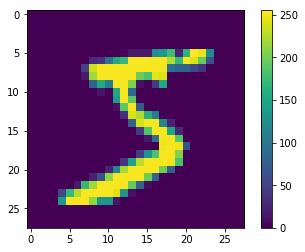

In [4]:
# this code is irrelevant for you to know, it's only visualization
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

Now all values (between 0 and 255; grayscale values) are normalized by simply dividing them by 255. There are better normalization functions (even though it depends on the problem) but this is good enough for something this simple

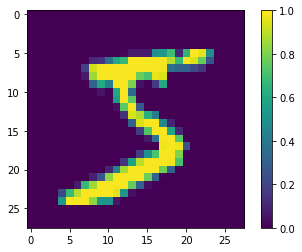

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [5]:
#important part

train_images = train_images / 255.0
test_images = test_images / 255.0

# same visualisation as before

plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()
print(train_images[0])

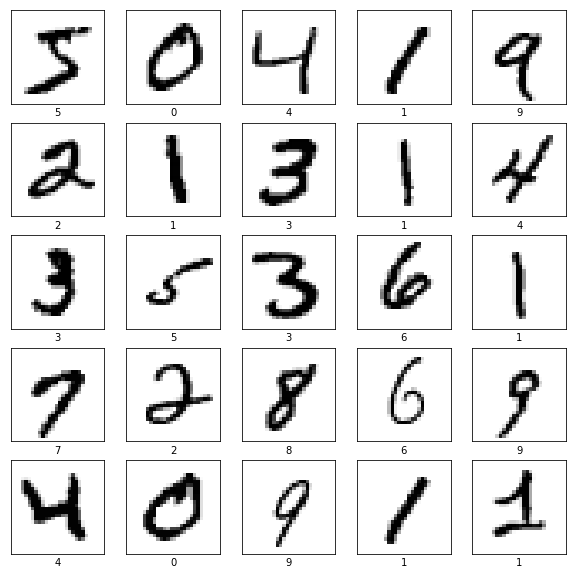

In [6]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])
plt.show()

# Building and training the network



Here the model is built using one "Flatten" layer to 'squish' the 28x28 matrix into one 784 long array of values. This is now followed by two Dense (fully connected) layers to process the information.

More about neuron amount and activation functions later

In [7]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

Instructions for updating:
Colocations handled automatically by placer.


more about this later; the model is just compiled (e.g. made ready to be used), loss function, optimized and metrics will be explained later

In [0]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Here the model is trained using the train_images and train_labels array for 5 epochs (5 iterations through the data)

In [9]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 8s 138us/sample - loss: 0.2605 - acc: 0.9260
Epoch 2/5
60000/60000 [==============================] - 8s 135us/sample - loss: 0.1147 - acc: 0.9660
Epoch 3/5
60000/60000 [==============================] - 8s 136us/sample - loss: 0.0796 - acc: 0.9760
Epoch 4/5
60000/60000 [==============================] - 8s 132us/sample - loss: 0.0596 - acc: 0.9812
Epoch 5/5
60000/60000 [==============================] - 8s 130us/sample - loss: 0.0454 - acc: 0.9858


# Evaluating/Testing The network

evaluates the model on the test datasets and shows how accurate it is (to avoid overtraining, once again will explain that seperately)

In [10]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 43us/sample - loss: 0.0779 - acc: 0.9769
Test accuracy: 0.9769


shows the predictions for the first image

In [14]:
predictions = model.predict(test_images)
print("Values of the networks' output nodes:", predictions[0])
print("Node containing the maximum value: ", np.argmax(predictions[0]))
print("Label of the Image:                ", test_labels[0])

Values of the networks' output nodes: [2.5986100e-08 3.1556060e-09 5.2008892e-07 6.8946573e-04 1.3018259e-10
 5.6821875e-07 7.7425601e-14 9.9930394e-01 3.4938186e-08 5.2940813e-06]
Node containing the maximum value:  7
Label of the Image:                 7


loading some visualization functions, completely irrelevant for our project but shows nicely what happens

In [0]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(predicted_label,
                                100*np.max(predictions_array),
                                true_label),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

showing a visualized version of the same prediction as before

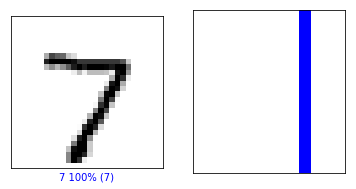

In [16]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

here you can let the network show the the first x predictions of the network visually

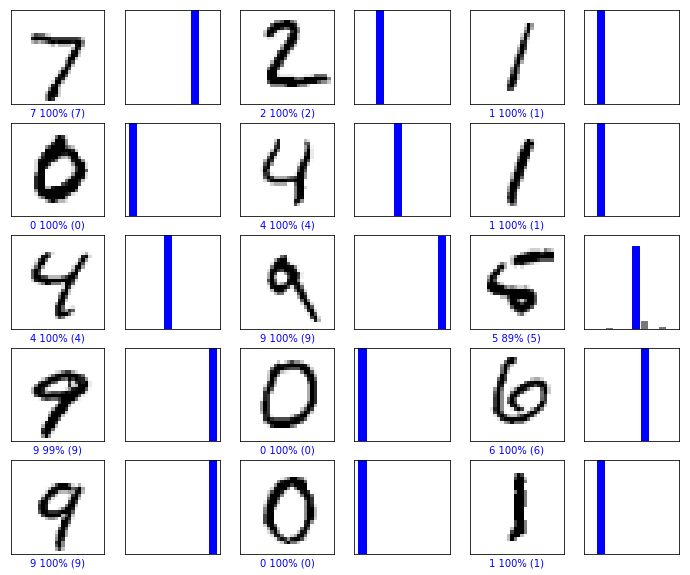

In [51]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

# Using the Network

load one example image that should be classified (here we could feed an external one such as drone footage but for simplicity's sake I just took one from the test array)

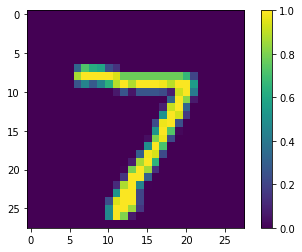

(28, 28)


In [46]:
img = test_images[0]
plt.figure()
plt.imshow(img)
plt.colorbar()
plt.grid(False)
plt.show()
print(img.shape)

image has to be added to an array first, otherwise tensorflow can't deal with a single image

In [0]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

model makes it's predictions

In [48]:
predictions_single = model.predict(img)

print(predictions_single)

[[2.5986051e-08 3.1556000e-09 5.2008744e-07 6.8946573e-04 1.3018209e-10
  5.6821824e-07 7.7425303e-14 9.9930394e-01 3.4938118e-08 5.2940759e-06]]


predictions are plotted out

7


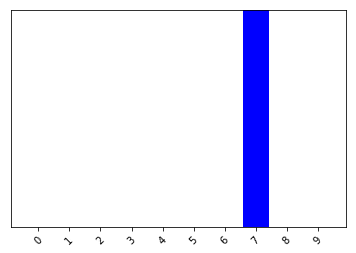

In [49]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), [0,1,2,3,4,5,6,7,8,9], rotation=45)
print(np.argmax(predictions_single))

now the results can be used to write a follow-up logic behind it (for example how to steer the drone), example here:

In [50]:
if(np.argmax(predictions_single)<5):
  print("value below 5")
else: 
  print("value above 5")

value above 5


Tutorial based on the official tensorflow (modified by Felix Quinque) tutorial following this license:

@title MIT License

Copyright (c) 2017 François Chollet

Permission is hereby granted, free of charge, to any person obtaining a
copy of this software and associated documentation files (the "Software"),
to deal in the Software without restriction, including without limitation
the rights to use, copy, modify, merge, publish, distribute, sublicense,
and/or sell copies of the Software, and to permit persons to whom the
Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in
all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL
THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING
FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER
DEALINGS IN THE SOFTWARE.